In [1]:
import geopandas as gpd
import pandas as pd
from shapely import wkt
import gzip
from pathlib import Path
import contextily as ctx
import matplotlib.pyplot as plt
import os

In [2]:
os.getcwd()

'/Users/rfitzger/dev/nrel/bam/bambam/script'

In [3]:
in_dir = Path("/Users/rfitzger/data/mep/mep3/output/osm/2025-02-21-co")

In [5]:
with gzip.open(in_dir / "edges-geometries-enumerated.txt.gz") as f:
    geoms = []
    for line in f:
        geoms.append(wkt.loads(line))

In [6]:
gdf = gpd.GeoDataFrame({"geometry": geoms}, crs="EPSG:4326")

/var/folders/bb/q3jbvk751d74rvpmrs35h4q1dfwf5g/T/ipykernel_78590/1232877485.py:2: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  gdf.to_crs("EPSG:3857").plot(ax=ax, edgecolor='k', alpha=0.8)
/Users/rfitzger/miniforge3/envs/geo/lib/python3.11/site-packages/contextily/tile.py:645: UserWarning: The inferred zoom level of 27 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


HTTPError: Tile URL resulted in a 404 error. Double-check your tile url:
https://basemap.nationalmap.gov/arcgis/rest/services/USGSTopo/MapServer/tile/20/524287/524288

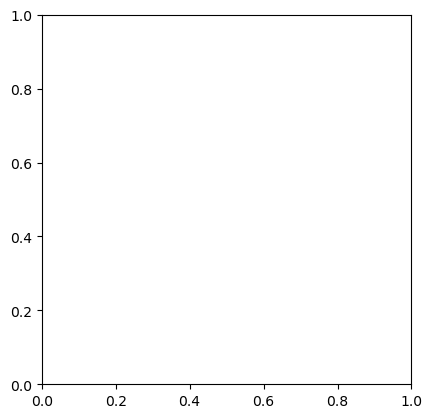

In [7]:
fig, ax = plt.subplots()
gdf.to_crs("EPSG:3857").plot(ax=ax, edgecolor='k', alpha=0.8)
ctx.add_basemap(ax=ax, source=ctx.providers.USGS.USTopo)

In [ ]:
df = pd.read_csv(in_dir / "vertices-complete.csv.gz")
df["geometry"] = gpd.points_from_xy(df['x'], df['y'])
df = gpd.GeoDataFrame(df, crs="EPSG:4326")

In [4]:
df = pd.read_csv(in_dir / "vertices-complete.csv.gz")

/var/folders/bb/q3jbvk751d74rvpmrs35h4q1dfwf5g/T/ipykernel_84993/1957556090.py:1: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(in_dir / "vertices-complete.csv.gz")


In [11]:
df

,osmid,x,y,highway,ele,junction,railway,_ref,consolidated_ids
0,27512370,-105.015625,39.733974,NaN,NaN,NaN,NaN,NaN,NaN
1,27512372,-105.015770,39.733437,NaN,NaN,NaN,NaN,NaN,NaN
2,27512374,-105.015870,39.732574,NaN,NaN,NaN,NaN,NaN,NaN
3,27512376,-105.015870,39.731953,NaN,NaN,NaN,NaN,NaN,NaN
4,27512378,-105.015530,39.730568,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
213032,12333915970,-105.029710,39.710230,NaN,NaN,NaN,NaN,NaN,NaN
213033,12333915972,-105.029816,39.710230,crossing,NaN,NaN,NaN,NaN,NaN
213034,12333920270,-104.933530,39.707504,NaN,NaN,NaN,NaN,NaN,NaN
213035,12333952271,-104.924800,39.728600,NaN,NaN,NaN,NaN,NaN,NaN
